In [1]:
import era5
from era5.model import FourierRegression, evaluate_ft

%matplotlib inline

In [13]:
variable = era5.UWind()

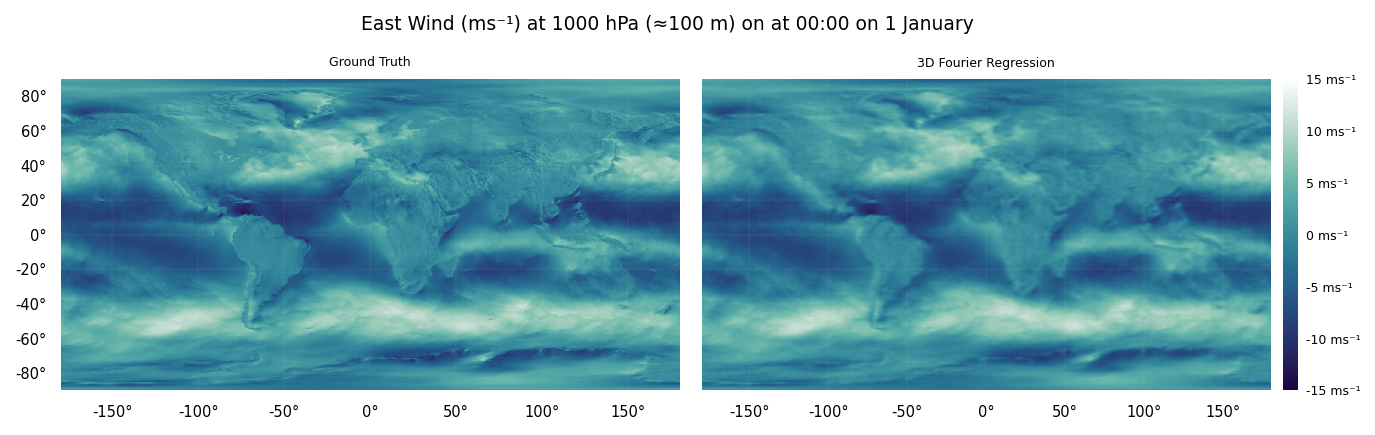


        Fourier Regression 3D:
            Data stdev: 10.8466 ms⁻¹
            MAE: 0.2471 ms⁻¹
            RMSE: 0.3494 ms⁻¹
            
            Input size: 49.51 MiBs
            Model size: 256.03 KiBs
            Size Ratio: 0.51%
            
            Frequencies: 120283
            Original size: 423.52 GiBs
            Compressed size: 2.14 GiBs
        


In [16]:
time = "TAVG-01-01 00:00"
model = FourierRegression(variable, [time], quantile=0.995)
model.fft()

fig = era5.MetFigure(cols=2, sharey=True, sharex=True)

plot = era5.plot(variable, [time, 1000], axes=fig[0])
plot.plot(colorbar=False)
plot.set_ax_title("Ground Truth")

plot = era5.plot(variable, [time, 1000], axes=fig[1])
plot.plot(model.predict()[-1])
plot.set_ax_title("3D Fourier Regression")

plot.show()
model.describe()

In [17]:
_ = evaluate_ft([model])


    Data stdev: 10.8466 ms⁻¹
    Data range: -20.453 to 81.375 ms⁻¹ (101.8281 ms⁻¹)
    
    R: 0.9995
    R²: 0.9990
    MAE: 0.2471 ms⁻¹
    RMSE: 0.3494 ms⁻¹
    
    MAPE: 3400.097%
    wMAPE: 2.937%
    SMAPE: 6.986%
    
    Original size: 423.52 GiBs
    Compressed size: 2.14 GiBs
    
